# 3D log-normal mock 

Demo of a 3D mock

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
plt.rc('font', family='fantasy', size=15)
import numpy as np
import nbodykit.lab as nb
from   glob import glob
import json

#plt.rc('font', family='serif', size=18)
#plt.rc('axes.spines', right=False, top=False)

In [3]:
import nbodykit 
nbodykit.__version__

'0.3.5'

In [2]:
# cosmology
redshift = 0.85     
cosmo    = nb.cosmology.Planck15
Plin     = nb.cosmology.LinearPower(cosmo, redshift, transfer='CLASS')
print('Input cosmology ', cosmo.parameter_file)
# np.savetxt('pk.txt', np.column_stack([k, 1.5**2*Plin(k)]), header='k - P(k)')

Input cosmology  Alpha_inf hyrec file : /Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/classylss/data/hyrec/Alpha_inf.dat
N_ncdm : 1
N_ur : 2.0328
Omega_b : 0.0486
Omega_cdm : 0.2589
Omega_k : 0.0
P_k_max_h/Mpc : 10.0
R_inf hyrec file : /Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/classylss/data/hyrec/R_inf.dat
T_cmb : 2.7255
extra metric transfer functions : y
gauge : synchronous
h : 0.6774
k_pivot : 0.05
ln10^{10}A_s : 3.064
m_ncdm : 0.06
n_s : 0.9667
output : vTk dTk mPk
sBBN file : /Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/classylss/data/bbn/sBBN.dat
tau_reio : 0.066
two_photon_tables hyrec file : /Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/classylss/data/hyrec/two_photon_tables.dat
z_max_pk : 100.0


In [3]:
# to load the FFTPOWER output
class loadjson(object):
    def __init__(self, file):
        with open(file) as jsonfile:
            data = json.load(jsonfile)
            self.poles = {'k':[], 'power_0':[]}
            self.attrs = data['attrs']
            
            for i in range(len(data['poles']['data']['__data__'])):
                self.poles['k'].append(data['poles']['data']['__data__'][i][0])
                self.poles['power_0'].append(data['poles']['data']['__data__'][i][1]['__complex__'][0])
            for keyi in self.poles.keys():
                self.poles[keyi] = np.array(self.poles[keyi])

# to load the FFTpower output                
from nbodykit.lab import FFTPower          

In [36]:
path = glob('/Volumes/TimeMachine/data/mocks_hj/3dbox_nmesh512_L5274.0_bias1.5_seed42/power*v2.json')
path

['/Volumes/TimeMachine/data/mocks_hj/3dbox_nmesh512_L5274.0_bias1.5_seed42/power_1024v2.json',
 '/Volumes/TimeMachine/data/mocks_hj/3dbox_nmesh512_L5274.0_bias1.5_seed42/power_256v2.json',
 '/Volumes/TimeMachine/data/mocks_hj/3dbox_nmesh512_L5274.0_bias1.5_seed42/power_512v2.json']

/Volumes/TimeMachine/data/mocks_hj/3dbox_nmesh512_L5274.0_bias1.5_seed42/power_1024v2.json
5137.8097171083755
/Volumes/TimeMachine/data/mocks_hj/3dbox_nmesh512_L5274.0_bias1.5_seed42/power_256v2.json
5137.8097171083755
/Volumes/TimeMachine/data/mocks_hj/3dbox_nmesh512_L5274.0_bias1.5_seed42/power_512v2.json
5137.8097171083755


/Users/rezaie/anaconda3/envs/py3p6/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


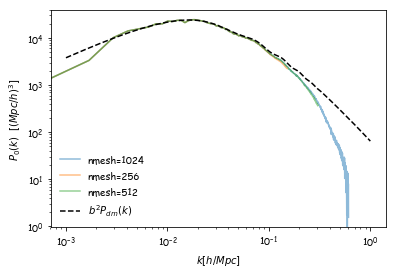

In [38]:
labels = ['1024', '256', '512']
plt.figure()
k = np.logspace(-3, 0, 512)
for i,pathi in enumerate(path):
    print(pathi)
    #data = loadjson(pathi)
    data = FFTPower.load(pathi)
    print(data.attrs['shotnoise'])
    plt.loglog(data.poles['k'], data.poles['power_0']-data.attrs['shotnoise'],\
               alpha=0.5, ls='-', label='nmesh=%s'%labels[i])
plt.loglog(k, 1.5**2*Plin(k), ls='--', color='k', label=r'$b^{2}P_{dm}(k)$')

# plt.axis([0.002, 0.2, 1.0e3, 5.0e4])
plt.ylabel(r'$P_{0}(k)$  $[(Mpc/h)^{3}]$')
plt.xlabel(r'$k[h/Mpc]$')
plt.legend(frameon=False)
#plt.savefig('pkmocks.pdf', bbox_inches='tight', dpi=300)